# Band Structure plot 

In [1]:
import os
import pandas as pd
file_path = '\\Users\\shambhu\\Desktop\\CFG_DFT\\CoFeMnGe\\band_01'
file_name = 'PBAND_ELEMENT_WEIGHT_DW.dat'
file = os.path.join(file_path, file_name)
df = pd.read_csv(file, skiprows=[1], sep = '\s\s+', engine='python')
df.head()

,#K-Path,Energy,Co,Mn,Fe,Ge
0,0.000,-11.957,0.122,0.072,0.122,0.385
1,0.012,-11.956,0.122,0.072,0.122,0.385
2,0.025,-11.955,0.122,0.072,0.122,0.385
3,0.037,-11.952,0.122,0.072,0.122,0.385
4,0.050,-11.948,0.122,0.072,0.122,0.385


In [2]:
df = df.rename(columns ={'#K-Path':'K_value'})

In [3]:
df = df[df['K_value'] != '# Band_Index']
df.head()

,K_value,Energy,Co,Mn,Fe,Ge
0,0.000,-11.957,0.122,0.072,0.122,0.385
1,0.012,-11.956,0.122,0.072,0.122,0.385
2,0.025,-11.955,0.122,0.072,0.122,0.385
3,0.037,-11.952,0.122,0.072,0.122,0.385
4,0.050,-11.948,0.122,0.072,0.122,0.385


In [4]:
df.drop(df[df['K_value'] =='# Band-Index'].index, inplace = True)

In [5]:
(df['K_value'] == '# Band-Index').value_counts() 

False    8400
Name: K_value, dtype: int64

In [6]:
 df['K_value']=df['K_value'].astype(float)

Now we plot the k- values along x-axis and band energy along y-axis. We use the elemental contribution as colormap, which makes it easy to visualize how each band are contributed by the elements. You can simply call the function band_plot(), which takes two arguments; element symbol (like Fe, Co, Mn, .....) and choice for map color (few common ones are Reds, Blues, Greens, ... ). You may also want to change the k_lines values for different symmetry points if it is different in your case (Check it!).

Saving plot to \Users\shambhu\Desktop\CFG_DFT\CoFeMnGe\band_01 with name Mn_contribution_Co2MnGe.png


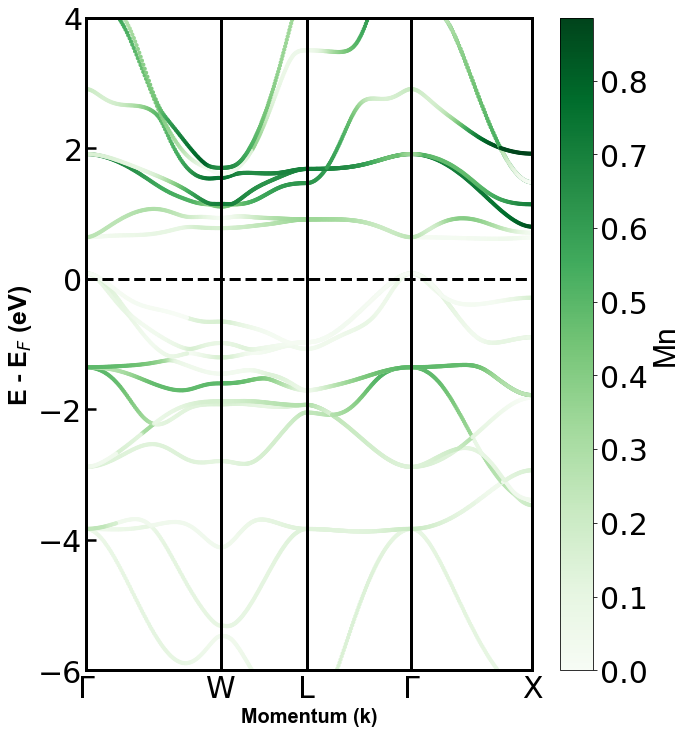

In [7]:
import matplotlib.pyplot as plt
from matplotlib.axis import Axis



def band_plot(element, map_color):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # to make axes thicker ('top', 'bottom', 'left', 'right')
    for side in ax.spines.keys():    
        ax.spines[side].set_linewidth(3)
    
     # y-axis tick labels thicker     
    ax.tick_params(axis='y', which='major', labelsize=30, width=2.5, length=10) 
    ax.tick_params(axis='x', which='major', labelsize=30, width=2.5, length=10) 

    # plotting data using dataframe (you may want to use different cmap for different elements)
    df.plot(kind='scatter', x='K_value', y='Energy', ax=ax, s = 10, c = element, cmap=map_color, figsize = (10,12))

    # draw  vertical lines inside the plot at desired x values; the list values could be different in your case, so check it.
    k_lines = [0,1.230,2.008,2.961,4.061]   # for Gamma, W, L, Gamma, and X respectively
    for num in k_lines:
        plt.axvline(num, color = 'black', linewidth=3.0)        
    plt.axhline(0, color = 'black', linewidth=3.0, ls='--')      # draw a dotted horizontal line 

    # changing tick marks direction
    plt.tick_params(direction='in')                              
    ax.set_xticks(k_lines)

    # to set tick labels to desired position
    labels = [item.get_text() for item in ax.get_xticklabels()]  
    labels =['$\Gamma$','W','L','$\Gamma$', 'X']  # change this according to k_lines
    ax.set_xticklabels(labels)

    # formatting axis labels and setting the limits
    plt.xlabel('Momentum (k)', fontsize=20, fontname = 'Arial', fontweight='bold') 
    plt.ylabel('E - E$_F$ (eV)', fontsize=25, fontname = 'Arial', fontweight='bold')
    plt.ylim(-6,4)
    plt.xlim(0,k_lines[-1])

    # formatting the colorbar tick labels and name
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=30)
    cbar.set_label('%s' %element, fontsize=30, fontname = 'Arial')

    # saving figure
    image_name = '%s_contribution_Co2MnGe.png' %element
    #saving_dir = '\\Users\\shambhu\\Desktop\\CFG_DFT\\CoFeMnGe\\band_01'
    image_path = os.path.join(file_path, image_name)
    plt.savefig(image_path, dpi=600, bbox_inches = 'tight')
    print("Saving plot to %s" %file_path + " with name %s" %image_name)

    
band_plot('Mn', 'Greens')    # change the name of the element and choose the color 